In [1]:
import os

import torch
import torchvision

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import base64
from IPython import display as dd

from norse.torch import PoissonEncoder

In [2]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_data = torchvision.datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform,
)

test_data = torchvision.datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform,
)

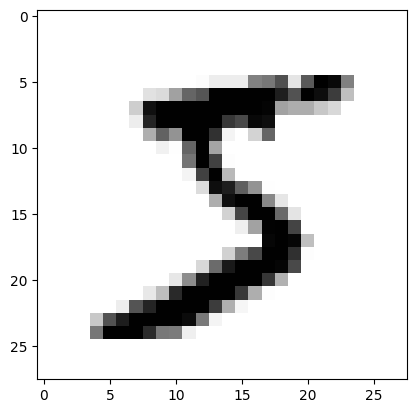

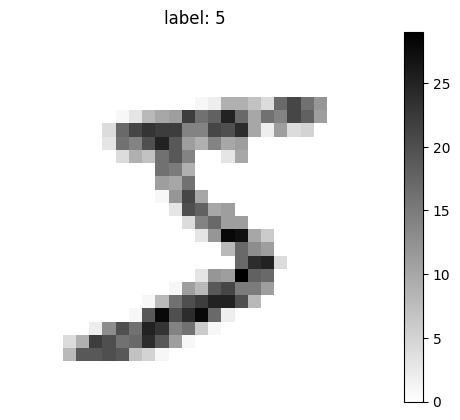


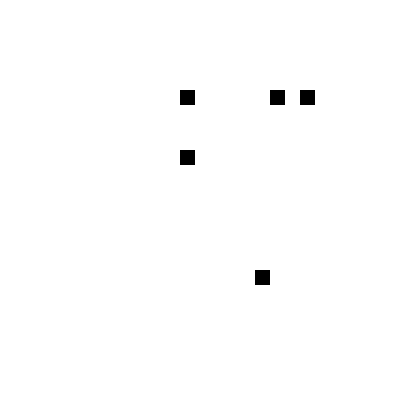

In [3]:
TIME = 300

encoder = PoissonEncoder(TIME, f_max=64)

plt.imshow(train_data[0][0].permute(1, 2, 0), cmap="gray_r")
plt.show()

# 時間軸で合計した画像を表示
tensor_sum = torch.sum(encoder(train_data[0][0]), dim=0)

plt.imshow(tensor_sum[0], cmap="gray_r")
plt.axis("off")
plt.title(f"label: {train_data[0][1]}")
plt.colorbar()
plt.show()


# 与えられたテンソルデータ
tensor_data = encoder(train_data[0][0])

# 画像のサイズ
image_width = len(tensor_data[0][0][0])
image_height = len(tensor_data[0][0])

# 画像の作成
image_frames = []
for frame_data in tensor_data:
    frame_array = (
        np.array(frame_data[0]) * 255
    )  # テンソルデータを0-255の範囲にスケーリング
    frame_array_inverted = 255 - frame_array  # 白黒の反転
    frame_image = Image.fromarray(
        frame_array_inverted.astype("uint8")
    )  # PIL Imageに変換
    # 画像を10倍に拡大
    frame_image = frame_image.resize(
        (frame_image.width * 15, frame_image.height * 15), Image.NEAREST
    )
    image_frames.append(frame_image)

# GIF画像の作成
image_frames[0].save(
    "output.gif", save_all=True, append_images=image_frames[1:], loop=0, duration=100
)  # durationは各フレームの表示時間（ミリ秒）

# GIF画像の表示
with open("output.gif", "rb") as f:
    b64 = base64.b64encode(f.read()).decode("ascii")

dd.display(dd.HTML(f'<img src="data:image/gif;base64,{b64}" />'))

In [11]:
def create_gif(image_folder, output_gif):
    # 画像を名前でソート
    images = sorted([img for img in os.listdir(image_folder) if img.endswith(".png")])

    # GIF画像の作成
    gif_images = []
    for img_name in images:
        img_path = os.path.join(image_folder, img_name)
        img = Image.open(img_path)
        gif_images.append(img)

    # GIFファイルの保存
    gif_images[0].save(
        output_gif,
        save_all=True,
        append_images=gif_images[1:],
        loop=0,
        duration=1000,
        optimize=True,
    )  # ループなし、各画像の表示時間を100ミリ秒に設定


image_folder = "./weight"  # 画像のあるディレクトリへのパス
output_gif = "weight.gif"  # 出力GIFのファイル名
create_gif(image_folder, output_gif)

# GIF画像の表示
with open("weight.gif", "rb") as f:
    b64 = base64.b64encode(f.read()).decode("ascii")

dd.display(dd.HTML(f'<img src="data:image/gif;base64,{b64}" />'))

error: 'H' format requires 0 <= number <= 65535

In [2]:
import glob
import cv2
import re


def atoi(text):
    return int(text) if text.isdigit() else text


def natural_keys(text):
    return [atoi(c) for c in re.split(r"(\d+)", text)]


img_array = []
for filename in sorted(glob.glob("weight/*.png"), key=natural_keys):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width, height)
    img_array.append(img)

name = "weight.mp4"
out = cv2.VideoWriter(name, cv2.VideoWriter_fourcc(*"mp4v"), 100.0, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

: 